# Cardio Good Fitness Case Study - Descriptive Statistics

The market research team at AdRight is assigned the task to identify the profile of the typical customer for each treadmill product offered by Cardio Fitness.

The market research team decides to investigate whether there are differences across the product lines with respect to cutomer characteristics.

The team decides to collect data on individuals who purchased a treadmill at a CardioGoodFitness retail store during the prior three months.

The data are the CardioGoodFitness.csv file.

### The team identifies the following customer variables to study:
    * product purchased, TM498 or TM798
    * gender,
    * age in years,
    * education, in years,
    * relationship status, single or partnered
    * annual household income,
    * average number of times the customer plans to use the treadmill each week
    * average number of times the customer expects to walk/run each week
    * and self-rated fitness on a 1-5 scale where 1 is poor shape and 5 is excellent shape
    

#### Perform descriptive analytics to create a customer profile for each CardioGood Fitness treadmill product line

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# load the cardio dataset

data = pd.read_csv('CardioGoodFitness.csv')
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


#### data inspection

In [3]:
data.shape

(180, 9)

In [4]:
data.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM195,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


### Exploratory Analysis

In [6]:
%matplotlib inline

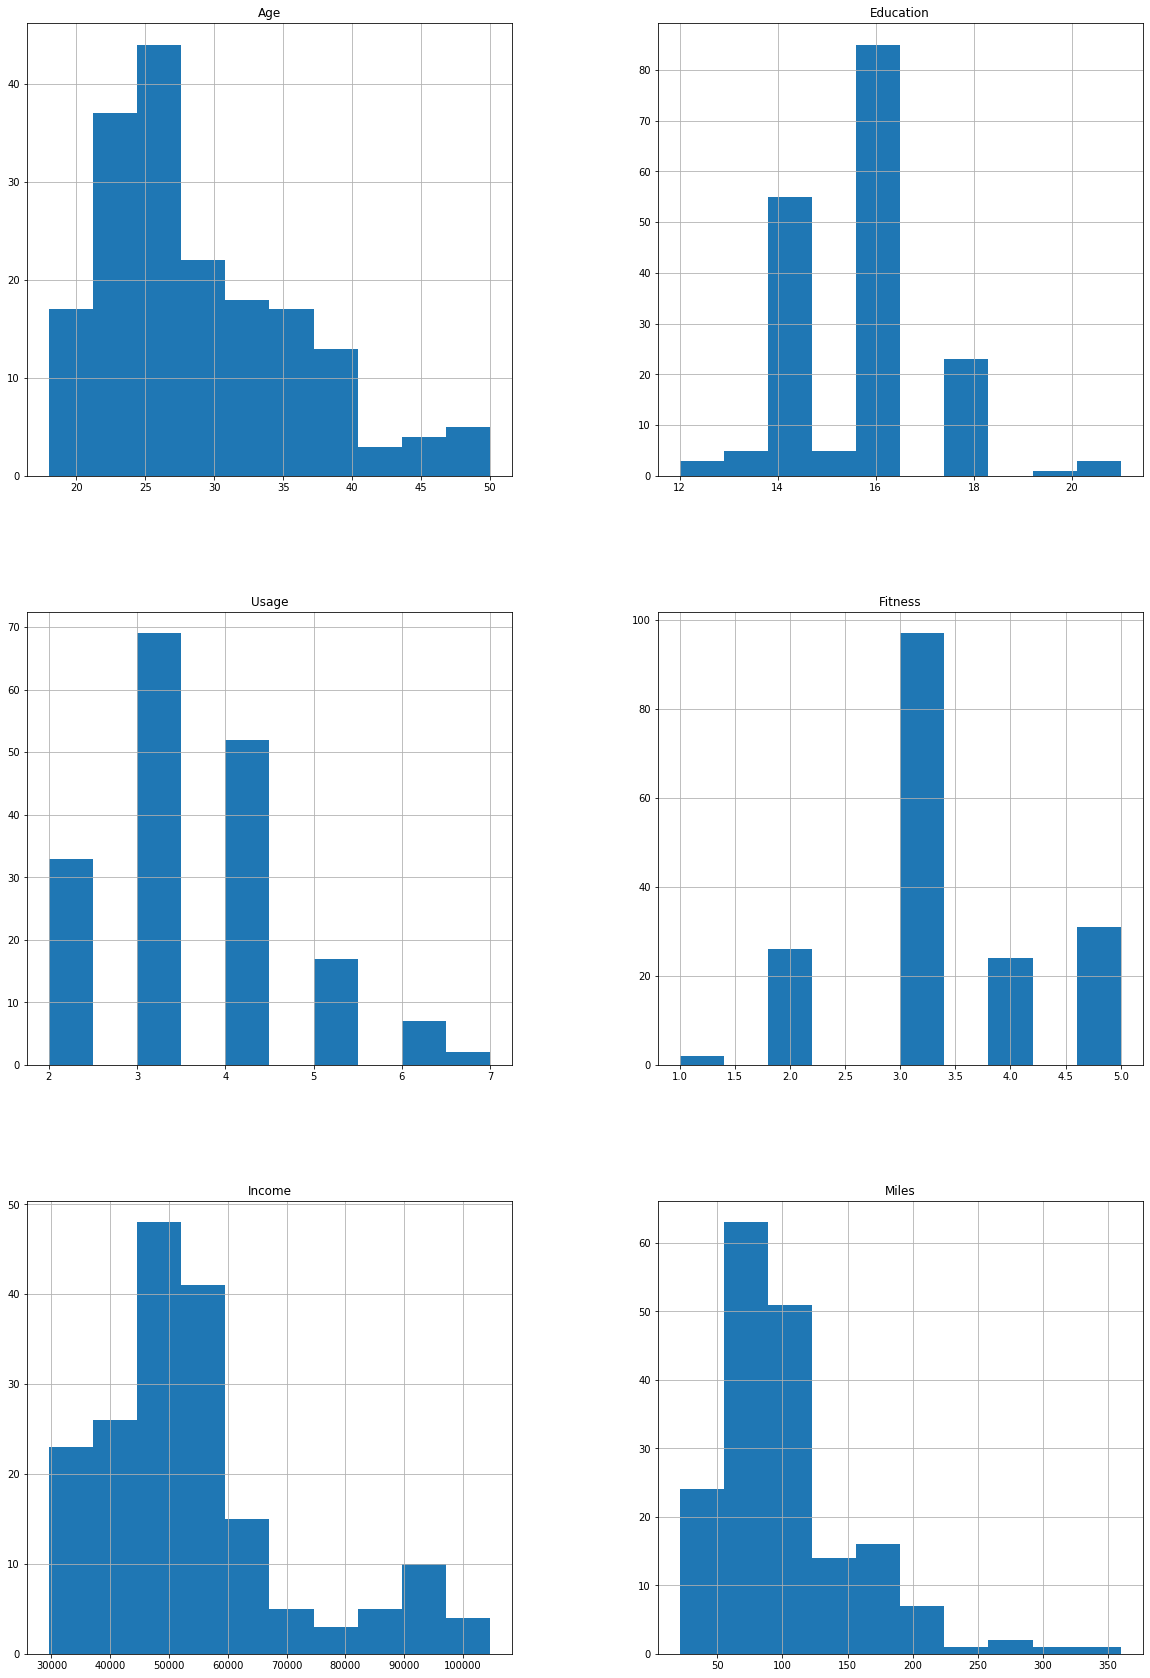

In [7]:
data.hist(figsize=(20,30))
plt.show()

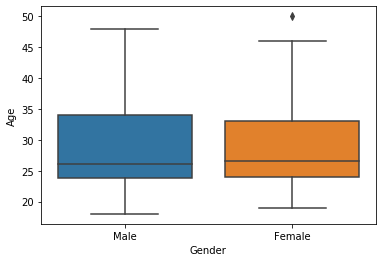

In [9]:
sns.boxplot(x='Gender', y='Age', data=data)
plt.show()

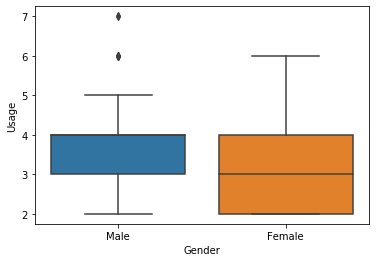

In [10]:
sns.boxplot(x='Gender', y='Usage', data=data)
plt.show()

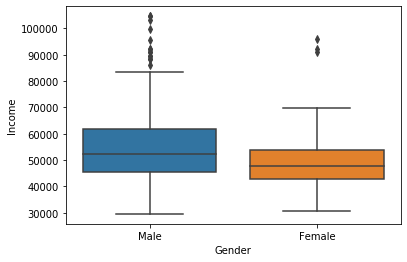

In [11]:
sns.boxplot(x='Gender', y='Income', data=data)
plt.show()

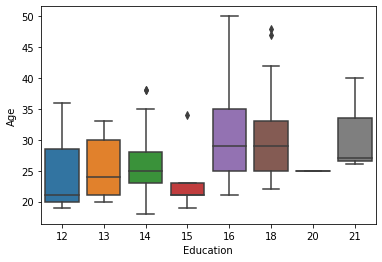

In [12]:
sns.boxplot(x='Education', y='Age', data=data)
plt.show()

#### Customer gender profile with respect to each product line

In [13]:
pd.crosstab(data.Product, data.Gender)

Gender,Female,Male
Product,,
TM195,40,40
TM498,29,31
TM798,7,33


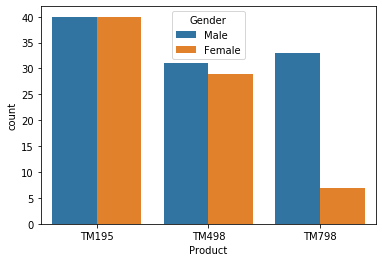

In [17]:
sns.countplot(x='Product', hue='Gender', data=data)
plt.show()

> <b>According to the data available, both Male and Females prefer the product line TM195</b>

> <b>Males prefer product line TM498 slighly more than Females</b>

> <b>Males patronize product line TM798 way more than Females</b>

In [14]:
pd.crosstab(data.Product, data.MaritalStatus)

MaritalStatus,Partnered,Single
Product,,
TM195,48,32
TM498,36,24
TM798,23,17


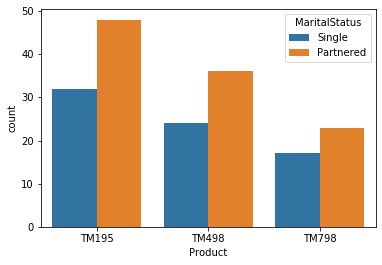

In [8]:
sns.countplot(x='Product', hue='MaritalStatus', data=data)
plt.show()

> <b>Partnered people patronize products more than single people</b>

In [16]:
pd.crosstab(data.Product, [data.MaritalStatus, data.Gender]).style.background_gradient(cmap='Greens')

> Both partnered and Single males patronize TM798 more than their female counterparts

> Partnered females patronize TM195 than single females

In [30]:
pd.pivot_table(data, 'Income', index=['Product'], columns=['MaritalStatus']).style.background_gradient(cmap='Reds',axis=1)

MaritalStatus,Partnered,Single
Product,,
TM195,47848.750000,44271.937500
TM498,49522.666667,48150.125000
TM798,82047.173913,66504.588235


> On an average, partnered people spend more on product purchase than singles

In [31]:
pd.pivot_table(data, 'Income', index=['Product'], columns='Gender', aggfunc=['mean']).style.background_gradient(cmap='Reds', axis=1)

> Average Income of Males that patronize TM798 is $75,000

In [33]:
pd.pivot_table(data, 'Income', index=['Product', 'Gender'], columns=['MaritalStatus']).style.background_gradient(cmap='Blues', axis=1)

> Partnered people have a higher Income average than Singles

In [34]:
pd.pivot_table(data, 'Miles', index=['Product', 'Gender'],
              columns=['MaritalStatus']).style.background_gradient(cmap='Oranges',axis=1)

> For TM195, Singles run a higher miles average than partners

> For TM498, partnered Females run a higher miles average than singles whiles single males run a higher average than partnered males

> For TM798, partneres run a higher miles average than singles

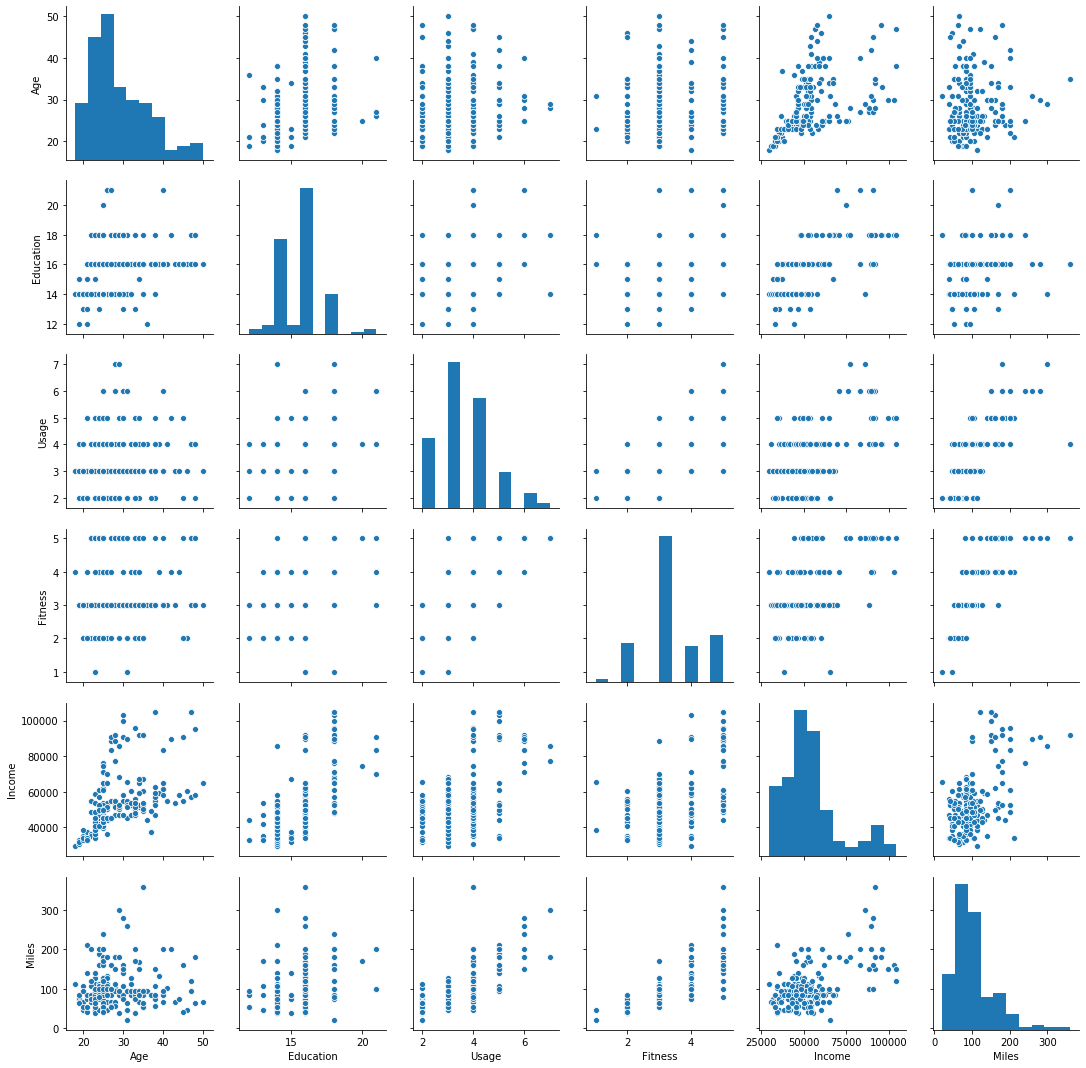

In [22]:
sns.pairplot(data)
plt.show()

In [37]:
data.corr().style.background_gradient(cmap='Reds')

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


> There is a positive linear relationship between Miles run and Usage

> There is a positive linear relationship between Fitnes and Usage and Miles

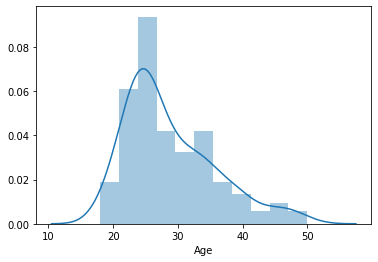

In [28]:
sns.distplot(data.Age)
plt.show()